In [1]:
import os, sys

notebook_dir = os.getcwd()

#add path
sys.path.append(os.path.abspath(os.path.join(notebook_dir, '..')))

In [2]:
from scripts.correlation import *
from scripts.load_data import *
from scripts.advanced_analytics import *
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load datas
raw_analyst_data = load_data("../../Data/raw_analyst_ratings.csv")
AAPL_data = load_data("../../Data/yfinance_data/AAPL_historical_data.csv")
AMZN_data = load_data("../../Data/yfinance_data/AMZN_historical_data.csv")
GOOG_data = load_data("../../Data/yfinance_data/GOOG_historical_data.csv")
META_data = load_data("../../Data/yfinance_data/META_historical_data.csv")
MSFT_data = load_data("../../Data/yfinance_data/MSFT_historical_data.csv")
NVDA_data = load_data("../../Data/yfinance_data/NVDA_historical_data.csv")
TSLA_data = load_data("../../Data/yfinance_data/TSLA_historical_data.csv")

Data loaded successfully!
Data loaded successfully!
Data loaded successfully!
Data loaded successfully!
Data loaded successfully!
Data loaded successfully!
Data loaded successfully!
Data loaded successfully!


In [7]:
import pandas as pd

# Drop rows with NaT values in the date column
raw_analyst_data = raw_analyst_data.dropna(subset=['date'])

In [8]:
# Attempt to convert dates again
raw_analyst_data['date'] = pd.to_datetime(raw_analyst_data['date'], errors='coerce')
AMZN_data['Date'] = pd.to_datetime(AMZN_data['Date'], errors='coerce')

raw_analyst_data['year'] = raw_analyst_data['date'].dt.year
AMZN_data['year'] = AMZN_data['Date'].dt.year

# Check for any NaT values after conversion
if raw_analyst_data['date'].isnull().any():
    print("There are still unparseable dates in raw_analyst_data.")
else:
    print("All dates in raw_analyst_data are parseable.")

if AMZN_data['Date'].isnull().any():
    print("There are unparseable dates in AMZN_data.")
else:
    print("All dates in AMZN_data are parseable.")

# Merge the data
merged_data = pd.merge(raw_analyst_data, AMZN_data, on='year', how='inner')

merged_data = merged_data.sample(n=1000000)
# Sentiment analysis
merged_data['sentiment'] = analyze_sentiment_vader(merged_data['headline'].tolist())

# Calculate daily stock returns
merged_data['daily_return'] = merged_data['Close'].pct_change()

# Display the merged data
merged_data

C:\Users\pc\AppData\Local\Temp\ipykernel_18780\2332162447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_analyst_data['date'] = pd.to_datetime(raw_analyst_data['date'], errors='coerce')
C:\Users\pc\AppData\Local\Temp\ipykernel_18780\2332162447.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_analyst_data['year'] = raw_analyst_data['date'].dt.year


All dates in raw_analyst_data are parseable.
All dates in AMZN_data are parseable.


,Unnamed: 0,headline,url,publisher,date,stock,year,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,sentiment,daily_return
4039677,417552,Electro Rent Shareholders Approve Acquisition ...,https://www.benzinga.com/news/16/08/8315175/el...,Hal Lindon,2016-08-05 16:08:13-04:00,ELRC,2016,2016-04-11,29.806999,30.200001,29.745501,29.796499,29.796499,54086000,0.0,0.0,0.0000,NaN
11516618,1142741,"ETFs to Watch August 19, 2013 (BSV, DTH, EWY)",https://www.benzinga.com/trading-ideas/long-id...,ETF Professor,2013-08-19 06:47:05-04:00,SIVR,2013,2013-08-14,14.714500,14.714500,14.527000,14.567000,14.567000,28300000,0.0,0.0,0.0000,-0.511117
6887238,690151,"Coffee Stocks That Might Have Bottomed (GMCR, ...",https://www.benzinga.com/news/earnings/12/07/2...,Nelson Hem,2012-07-10 09:39:53-04:00,IWO,2012,2012-12-03,12.627000,12.708000,12.500000,12.516500,12.516500,59812000,0.0,0.0,0.0000,-0.140763
13697784,1359432,Stocks That Hit 52-Week Lows On Thursday,https://www.benzinga.com/news/20/03/15538835/s...,Lisa Levin,2020-03-12 12:10:12-04:00,WLFC,2020,2020-04-14,110.023499,114.599998,109.310501,114.166000,114.166000,161744000,0.0,0.0,-0.2023,8.121240
482160,58500,"ALLETE Q1 EPS $1.280 Beats $1.140 Estimate, Sa...",https://www.benzinga.com/news/earnings/20/05/1...,Benzinga Newsdesk,2020-05-06 06:45:16-04:00,ALE,2020,2020-06-02,123.349998,123.676498,122.265503,123.620499,123.620499,50598000,0.0,0.0,-0.1531,0.082814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8727720,889212,75 Stocks Moving In Thursday's Mid-Day Session,https://www.benzinga.com/news/20/04/15777780/7...,Lisa Levin,2020-04-09 13:02:57-04:00,NCMI,2020,2020-09-09,160.149506,165.158997,159.250000,163.430496,163.430496,103774000,0.0,0.0,0.0000,0.135447
6220759,640263,Stifel Nicolaus Downgrades Headwaters to Hold,https://www.benzinga.com/news/16/11/8733318/st...,Paul Quintaro,2016-11-23 07:28:51-04:00,HW,2016,2016-12-28,38.812500,39.000000,38.525002,38.606499,38.606499,66020000,0.0,0.0,0.0000,-0.763774
2485496,250142,"Chatham Lodging Trust Suspends Dividend, Cuts ...",https://www.benzinga.com/news/20/03/15677104/c...,Benzinga Newsdesk,2020-03-26 16:12:01-04:00,CLDT,2020,2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000,0.0,0.0,0.2732,1.428309
7553820,761108,Lennox International Q1 EPS $0.560 Does Not Co...,https://www.benzinga.com/news/earnings/20/04/1...,Benzinga Newsdesk,2020-04-20 07:31:04-04:00,LII,2020,2020-09-23,156.021500,156.350006,149.619003,149.992996,149.992996,113054000,0.0,0.0,-0.1531,0.599951


In [ ]:
# import pandas as pd
merged_data.to_csv('merged_data.csv', index=False)

In [4]:
# Load data
data = load_data("merged_data.csv")
data

Data loaded successfully!


,Unnamed: 0,headline,url,publisher,date,stock,year,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,sentiment,daily_return
0,417552,Electro Rent Shareholders Approve Acquisition ...,https://www.benzinga.com/news/16/08/8315175/el...,Hal Lindon,2016-08-05 16:08:13-04:00,ELRC,2016,2016-04-11,29.806999,30.200001,29.745501,29.796499,29.796499,54086000,0.0,0.0,0.0000,NaN
1,1142741,"ETFs to Watch August 19, 2013 (BSV, DTH, EWY)",https://www.benzinga.com/trading-ideas/long-id...,ETF Professor,2013-08-19 06:47:05-04:00,SIVR,2013,2013-08-14,14.714500,14.714500,14.527000,14.567000,14.567000,28300000,0.0,0.0,0.0000,-0.511117
2,690151,"Coffee Stocks That Might Have Bottomed (GMCR, ...",https://www.benzinga.com/news/earnings/12/07/2...,Nelson Hem,2012-07-10 09:39:53-04:00,IWO,2012,2012-12-03,12.627000,12.708000,12.500000,12.516500,12.516500,59812000,0.0,0.0,0.0000,-0.140763
3,1359432,Stocks That Hit 52-Week Lows On Thursday,https://www.benzinga.com/news/20/03/15538835/s...,Lisa Levin,2020-03-12 12:10:12-04:00,WLFC,2020,2020-04-14,110.023499,114.599998,109.310501,114.166000,114.166000,161744000,0.0,0.0,-0.2023,8.121240
4,58500,"ALLETE Q1 EPS $1.280 Beats $1.140 Estimate, Sa...",https://www.benzinga.com/news/earnings/20/05/1...,Benzinga Newsdesk,2020-05-06 06:45:16-04:00,ALE,2020,2020-06-02,123.349998,123.676498,122.265503,123.620499,123.620499,50598000,0.0,0.0,-0.1531,0.082814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,889212,75 Stocks Moving In Thursday's Mid-Day Session,https://www.benzinga.com/news/20/04/15777780/7...,Lisa Levin,2020-04-09 13:02:57-04:00,NCMI,2020,2020-09-09,160.149506,165.158997,159.250000,163.430496,163.430496,103774000,0.0,0.0,0.0000,0.135447
999996,640263,Stifel Nicolaus Downgrades Headwaters to Hold,https://www.benzinga.com/news/16/11/8733318/st...,Paul Quintaro,2016-11-23 07:28:51-04:00,HW,2016,2016-12-28,38.812500,39.000000,38.525002,38.606499,38.606499,66020000,0.0,0.0,0.0000,-0.763774
999997,250142,"Chatham Lodging Trust Suspends Dividend, Cuts ...",https://www.benzinga.com/news/20/03/15677104/c...,Benzinga Newsdesk,2020-03-26 16:12:01-04:00,CLDT,2020,2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000,0.0,0.0,0.2732,1.428309
999998,761108,Lennox International Q1 EPS $0.560 Does Not Co...,https://www.benzinga.com/news/earnings/20/04/1...,Benzinga Newsdesk,2020-04-20 07:31:04-04:00,LII,2020,2020-09-23,156.021500,156.350006,149.619003,149.992996,149.992996,113054000,0.0,0.0,-0.1531,0.599951


In [5]:
data = data.sample(n=200000)

In [6]:
# Advanced Sentiment Analysis
data['finbert_sentiment'], data['finbert_score'] = zip(*data['headline'].apply(analyze_sentiment_vader))

In [7]:
data['finbert_sentiment']

947845    0.3400
868145    0.3612
258210    0.0000
234255   -0.2732
112464    0.8720
           ...  
765320    0.0000
529499    0.0000
821774    0.0000
192560   -0.6369
176069   -0.2023
Name: finbert_sentiment, Length: 200000, dtype: float64

In [8]:
data['finbert_score']

25496     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
61881     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
5382      {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...
416397    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
811912    {'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'comp...
                                ...                        
67004     {'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...
721706    {'neg': 0.273, 'neu': 0.597, 'pos': 0.13, 'com...
225054    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
400488    {'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'comp...
521780    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: finbert_score, Length: 200000, dtype: object

In [8]:
# Topic Modeling
lda_model, vectorizer = perform_topic_modeling(data)

In [10]:
lda_model

LatentDirichletAllocation(n_components=5, random_state=42)

In [11]:
vectorizer

CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [9]:
# Event Detection
keywords = ['earnings', 'merger', 'acquisition', 'fda approval']
data = detect_market_events(data, keywords)

In [13]:
data

,Unnamed: 0,headline,url,publisher,date,stock,year,Date,Open,High,...,Close,Adj Close,Volume,Dividends,Stock Splits,sentiment,daily_return,finbert_sentiment,finbert_score,event
25496,198839,"Earnings Scheduled For May 27, 2015",https://www.benzinga.com/news/earnings/15/05/5...,Monica Gerson,2015-05-27 04:33:20-04:00,BWS,2015,2015-08-17,26.564501,26.937000,...,26.761000,26.761000,51634000,0.0,0.0,0.0000,-0.193581,0.0000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",True
61881,592353,Morgan Stanley Maintains Equal-Weight on W.W. ...,https://www.benzinga.com/news/20/04/15809116/m...,Benzinga_Newsdesk,2020-04-15 10:21:40-04:00,GWW,2020,2020-07-20,150.009995,160.067993,...,159.841995,159.841995,151964000,0.0,0.0,0.0000,1.012844,0.0000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",False
5382,903530,Gabelli Lowering Estimates On TD Ameritrade,https://www.benzinga.com/analyst-ratings/analy...,Jonathan Chen,2011-07-20 09:15:33-04:00,NIM,2011,2011-10-11,11.530000,11.837500,...,11.774000,11.774000,100074000,0.0,0.0,-0.2500,-0.618897,-0.2500,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...",False
416397,1247652,40 Biggest Movers From Friday,https://www.benzinga.com/news/19/07/14071670/4...,Lisa Levin,2019-07-15 05:47:35-04:00,TOWR,2019,2019-06-04,84.961998,86.541000,...,86.477997,86.477997,113582000,0.0,0.0,0.0000,5.488445,0.0000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",False
811912,167421,Stocks That Hit 52-Week Lows On Wednesday,https://www.benzinga.com/news/20/03/15528100/s...,Lisa Levin,2020-03-11 11:41:58-04:00,BKK,2020,2020-03-04,97.328499,98.900002,...,98.791496,98.791496,95458000,0.0,0.0,-0.2023,-0.379634,-0.2023,"{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'comp...",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67004,1288384,"Ur-Energy, Uranium Energy Shares Also Tick Hig...",https://www.benzinga.com/trading-ideas/movers/...,Benzinga Newsdesk,2020-01-31 10:46:03-04:00,UEC,2020,2020-12-30,167.050003,167.104996,...,164.292496,164.292496,64186000,0.0,0.0,0.8402,0.722414,0.8402,"{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...",False
721706,1112122,Shares of several technology companies are tra...,https://www.benzinga.com/wiim/20/05/16023444/s...,Benzinga Newsdesk,2020-05-13 12:11:54-04:00,SABR,2020,2020-08-28,171.149994,171.668503,...,170.089996,170.089996,57940000,0.0,0.0,-0.7096,0.568467,-0.7096,"{'neg': 0.273, 'neu': 0.597, 'pos': 0.13, 'com...",False
225054,1105317,29 Stocks Moving In Wednesday's Mid-Day Session,https://www.benzinga.com/news/18/03/11360480/2...,Lisa Levin,2018-03-14 12:40:50-04:00,RSO,2018,2018-08-09,94.099998,95.728500,...,94.926003,94.926003,97208000,0.0,0.0,0.0000,0.073623,0.0000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",False
400488,1130472,S&P Dow Jones Indices Says 'Chemical Financial...,https://www.benzinga.com/news/16/08/8380278/s-...,Paul Quintaro,2016-08-22 17:23:52-04:00,SGNT,2016,2016-04-08,29.716000,29.893000,...,29.730000,29.730000,51838000,0.0,0.0,0.2960,-0.604144,0.2960,"{'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'comp...",False


In [10]:
# Predictive Modeling
model = build_predictive_model(data)

Model MSE: 5.846382723261059


In [11]:
import joblib

# Save the best model to a file
joblib.dump(model, 'best_model.pkl')
print("Model saved to best_model.pkl")

Model saved to best_model.pkl


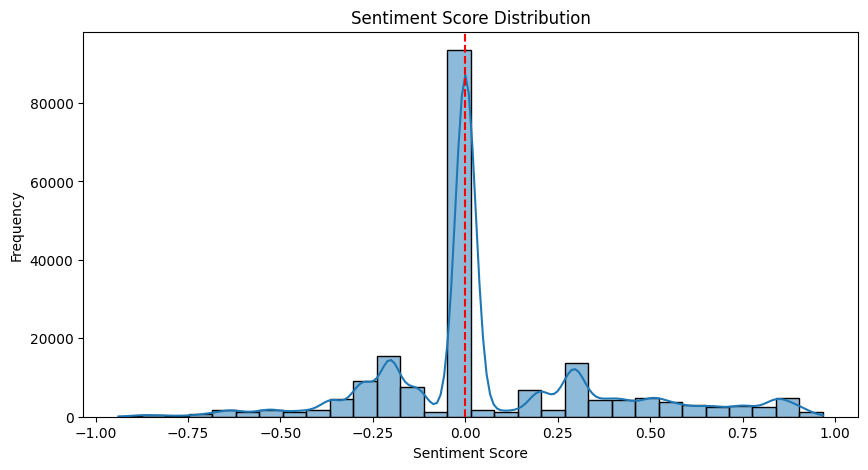

In [ ]:
# Sentiment Distribution
plt.figure(figsize=(10, 5))
sns.histplot(data['finbert_sentiment'], bins=30, kde=True)
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--')
plt.show()

In [15]:
# We can visualize the top words in each topic
for topic_idx, topic in enumerate(lda_model.components_):
    message = "Topic {}: {}".format(topic_idx, " ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-6:-1]]))
    print(message)

Topic 0: stocks session yesterday moving new
Topic 1: week stocks 52 hit trading
Topic 2: shares earnings reports trading share
Topic 3: eps sales estimate vs q1
Topic 4: price target market update shares


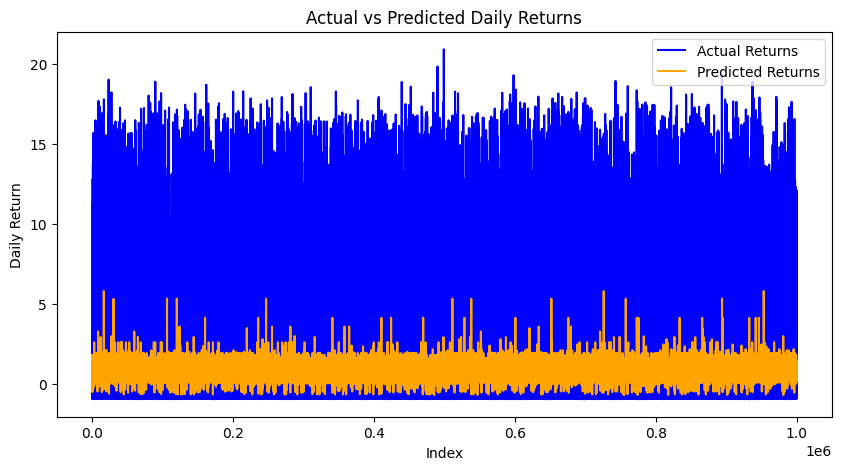

In [12]:
features = data[['sentiment', 'finbert_sentiment']]

# 3. Predictive Model Performance
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x=data.index, y='daily_return', label='Actual Returns', color='blue')
sns.lineplot(data=data, x=data.index, y=model.predict(features), label='Predicted Returns', color='orange')
plt.title('Actual vs Predicted Daily Returns')
plt.xlabel('Index')
plt.ylabel('Daily Return')
plt.legend()
plt.show()